In [66]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.simplefilter('ignore', FutureWarning)

data_2d = pd.read_csv('/content/drive/MyDrive/IT/homework6/data_2d.csv')
mnist = pd.read_csv('/content/drive/MyDrive/IT/homework6/mnist.csv')

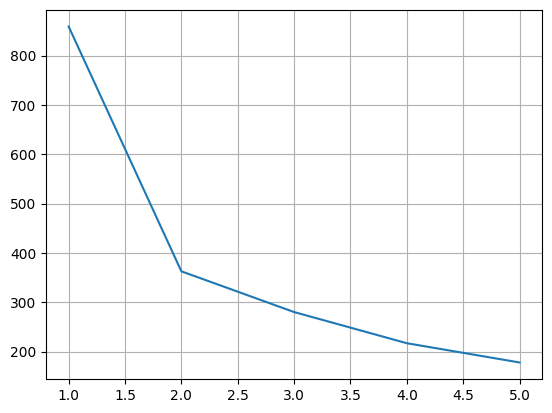

In [67]:
# Oптимальнa кількість кластерів для датасету data_2d = 2
wcss_data_2d = []
itter = range(1, 6)

for i in itter:
    clustering_data_2d = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_data_2d.fit(data_2d)
    wcss_data_2d.append(clustering_data_2d.inertia_)

sns.lineplot(x = itter, y = wcss_data_2d);
plt.grid()

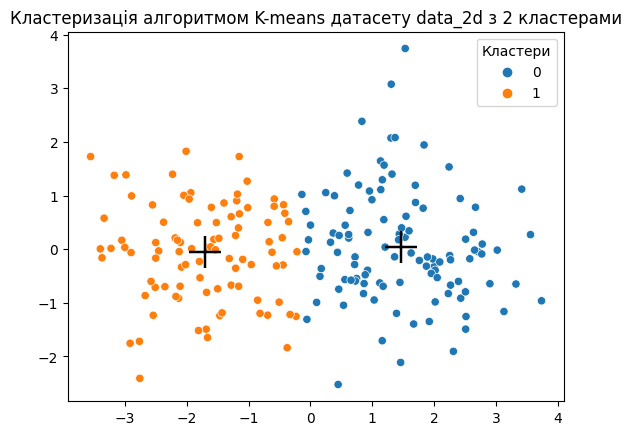

In [89]:
pca_data_2d = PCA(n_components=2).fit_transform(data_2d)
kmeans = KMeans(n_clusters = 2).fit(pca_data_2d)

sns.scatterplot(x=pca_data_2d[:, 0], y=pca_data_2d[:, 1], hue=kmeans.labels_)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='k', marker='+', s=500)
plt.title(f'Кластеризація алгоритмом K-means датасету data_2d з 2 кластерами')
plt.legend(title='Кластери')
plt.show()

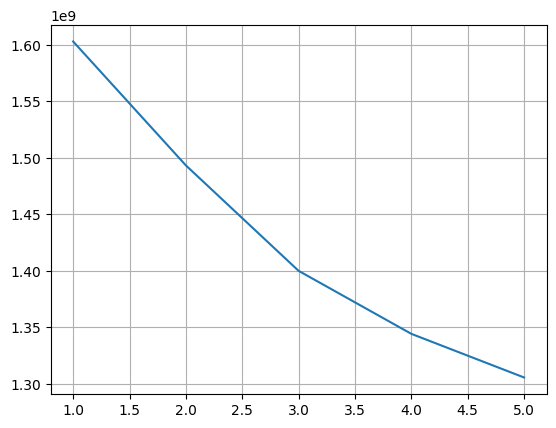

In [84]:
# Oптимальнa кількість кластерів для датасету mnist = 3
wcss_mnist = []

for i in itter:
    clustering_mnist = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_mnist.fit(mnist)
    wcss_mnist.append(clustering_mnist.inertia_)

sns.lineplot(x = itter, y = wcss_mnist);
plt.grid()

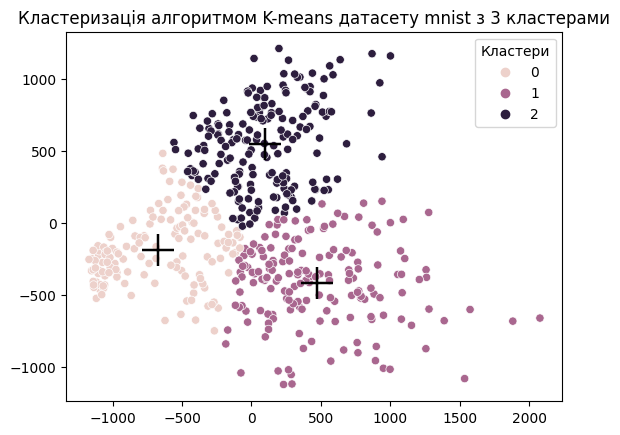

In [88]:
pca_mnist = PCA(n_components=2).fit_transform(mnist)
kmeans = KMeans(n_clusters = 3).fit(pca_mnist)

sns.scatterplot(x=pca_mnist[:, 0], y=pca_mnist[:, 1], hue=kmeans.labels_)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', marker='+', s=500)
plt.title(f'Кластеризація алгоритмом K-means датасету mnist з 3 кластерами')
plt.legend(title='Кластери')
plt.show()